In [38]:

import numpy as np 
import pandas as pd 
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from scipy import stats
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import confusion_matrix



In [8]:
# reading data
df= pd.read_csv('diabetes.csv')

df_original=df.copy()
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


<AxesSubplot:xlabel='BloodPressure'>

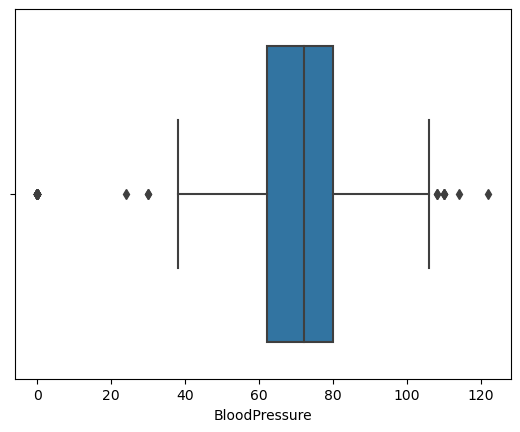

In [9]:
# Visualizing my data before removing nulls
sns.boxplot(data=df, x= df["BloodPressure"])

<AxesSubplot:xlabel='SkinThickness'>

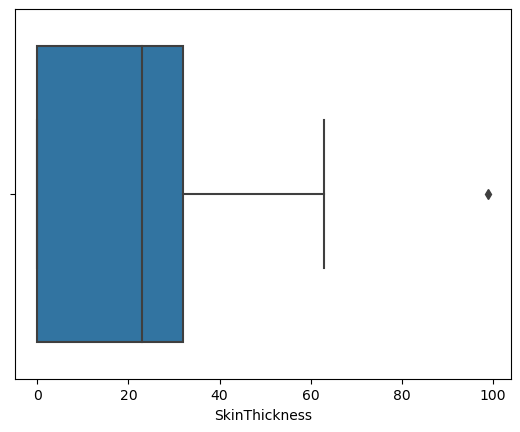

In [10]:
sns.boxplot(data=df, x= df["SkinThickness"])

<AxesSubplot:xlabel='Insulin'>

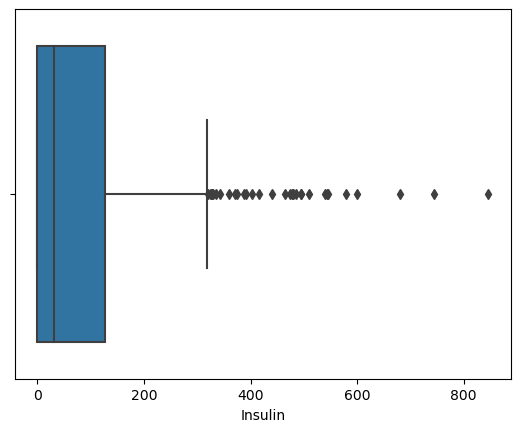

In [11]:
sns.boxplot(data=df, x= df["Insulin"])

<AxesSubplot:xlabel='Glucose'>

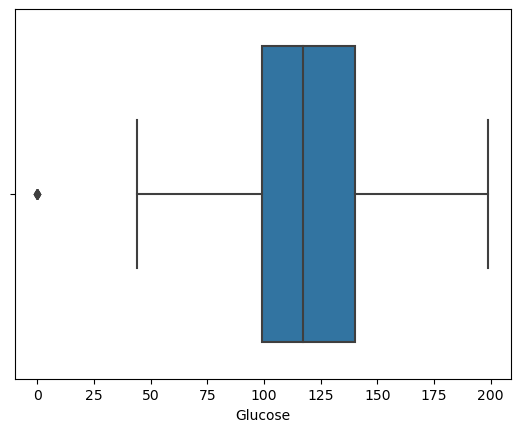

In [12]:
sns.boxplot(data=df, x= df["Glucose"]) 

<AxesSubplot:xlabel='BMI'>

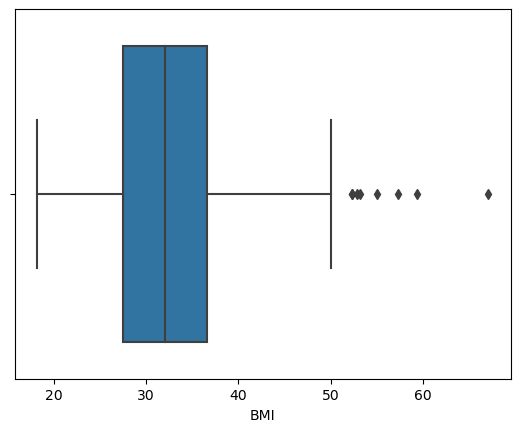

In [14]:
sns.boxplot(data=df, x= df["BMI"]) 

In [17]:
#getting inputs and outcome
x=df.drop(columns=['Outcome']) 
y=df['Outcome']
x.head(16)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.0,155.0,33.6,0.627,50
1,1,85.0,66.0,29.0,155.0,26.6,0.351,31
2,8,183.0,64.0,29.0,155.0,23.3,0.672,32
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33
5,5,116.0,74.0,29.0,155.0,25.6,0.201,30
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26
7,10,115.0,72.0,29.0,155.0,35.3,0.134,29
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53
9,8,125.0,96.0,29.0,155.0,32.0,0.232,54


In [15]:

#handling zero-values by replacing them with the mean

zero_not_allowed=["Glucose",
                   "BloodPressure","SkinThickness",
                   "Insulin","BMI"]

df[zero_not_allowed].head(16)
    
def replaceZeroes(column):
    df[column]=df[column].replace(0,np.NAN)
    mean =int(df[column].mean(skipna=True))
    df[column]=df[column].replace(np.NAN,mean)
    return df[column]   

for col in zero_not_allowed:  
    non_zeroes_dataframe=replaceZeroes(col)
    print(non_zeroes_dataframe)
df.head(16)


0      148.0
1       85.0
2      183.0
3       89.0
4      137.0
       ...  
763    101.0
764    122.0
765    121.0
766    126.0
767     93.0
Name: Glucose, Length: 768, dtype: float64
0      72.0
1      66.0
2      64.0
3      66.0
4      40.0
       ... 
763    76.0
764    70.0
765    72.0
766    60.0
767    70.0
Name: BloodPressure, Length: 768, dtype: float64
0      35.0
1      29.0
2      29.0
3      23.0
4      35.0
       ... 
763    48.0
764    27.0
765    23.0
766    29.0
767    31.0
Name: SkinThickness, Length: 768, dtype: float64
0      155.0
1      155.0
2      155.0
3       94.0
4      168.0
       ...  
763    180.0
764    155.0
765    112.0
766    155.0
767    155.0
Name: Insulin, Length: 768, dtype: float64
0      33.6
1      26.6
2      23.3
3      28.1
4      43.1
       ... 
763    32.9
764    36.8
765    26.2
766    30.1
767    30.4
Name: BMI, Length: 768, dtype: float64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,155.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,155.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,155.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
5,5,116.0,74.0,29.0,155.0,25.6,0.201,30,0
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
7,10,115.0,72.0,29.0,155.0,35.3,0.134,29,0
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
9,8,125.0,96.0,29.0,155.0,32.0,0.232,54,1


<AxesSubplot:xlabel='BloodPressure'>

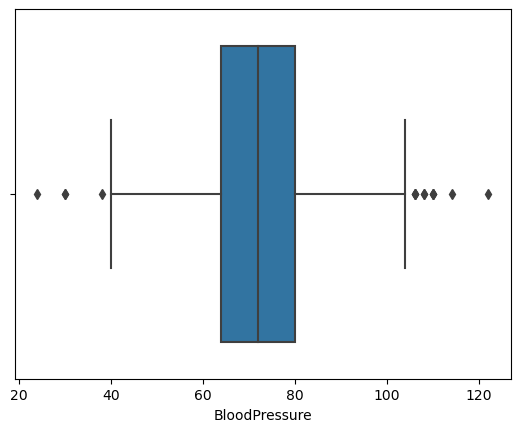

In [19]:
# Visualizing my data after removing nulls
sns.boxplot(data=df, x= df["BloodPressure"])

<AxesSubplot:xlabel='SkinThickness'>

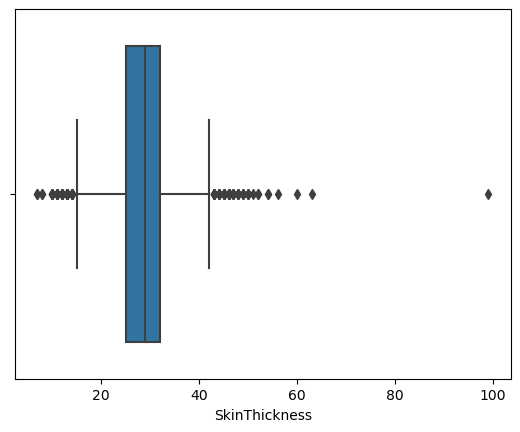

In [20]:
sns.boxplot(data=df, x= df["SkinThickness"])

<AxesSubplot:xlabel='Insulin'>

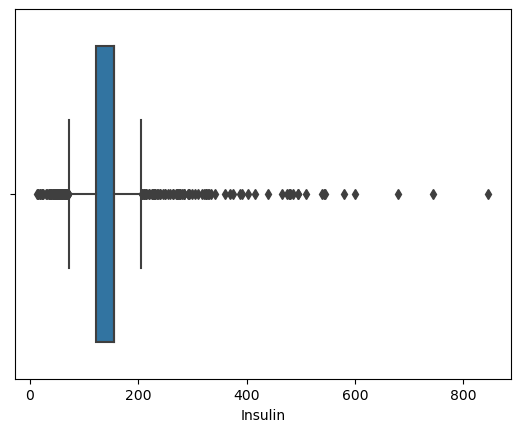

In [21]:
sns.boxplot(data=df, x= df["Insulin"])

<AxesSubplot:xlabel='Glucose'>

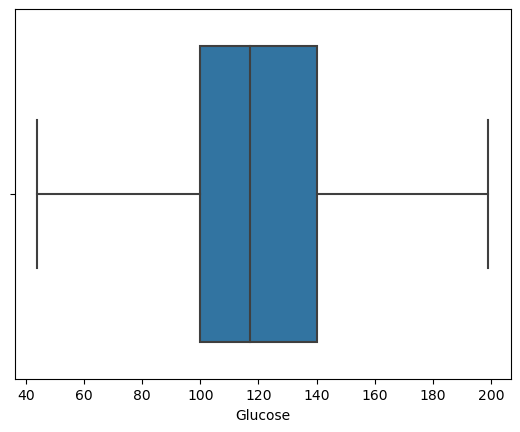

In [22]:
sns.boxplot(data=df, x= df["Glucose"]) 

<AxesSubplot:xlabel='BMI'>

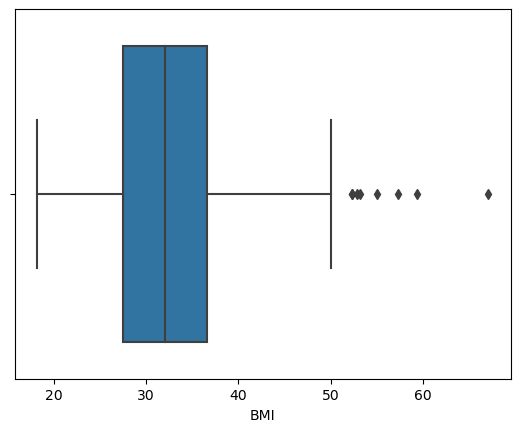

In [23]:
sns.boxplot(data=df, x= df["BMI"]) 

In [24]:
# imputng preprcoessing 
def imputer(column_name,x):
 
            imputer=SimpleImputer(strategy="mean")
            x[column_name]=imputer.fit_transform(x[[column_name]])
            return (x[column_name])
            
for column_name in x.columns:
    print(imputer(column_name,x))
    
# =============================================================================

0       6.0
1       1.0
2       8.0
3       1.0
4       0.0
       ... 
763    10.0
764     2.0
765     5.0
766     1.0
767     1.0
Name: Pregnancies, Length: 768, dtype: float64
0      148.0
1       85.0
2      183.0
3       89.0
4      137.0
       ...  
763    101.0
764    122.0
765    121.0
766    126.0
767     93.0
Name: Glucose, Length: 768, dtype: float64
0      72.0
1      66.0
2      64.0
3      66.0
4      40.0
       ... 
763    76.0
764    70.0
765    72.0
766    60.0
767    70.0
Name: BloodPressure, Length: 768, dtype: float64
0      35.0
1      29.0
2      29.0
3      23.0
4      35.0
       ... 
763    48.0
764    27.0
765    23.0
766    29.0
767    31.0
Name: SkinThickness, Length: 768, dtype: float64
0      155.0
1      155.0
2      155.0
3       94.0
4      168.0
       ...  
763    180.0
764    155.0
765    112.0
766    155.0
767    155.0
Name: Insulin, Length: 768, dtype: float64
0      33.6
1      26.6
2      23.3
3      28.1
4      43.1
       ... 
763    32.9
764

In [25]:
# finding boundries
def find_boundaries(x,col):
    iqr=x[col].quantile(0.75)-x[col].quantile(0.25)
    lower_boundary = x[col].quantile(0.25)-(iqr* 1.5)
    upper_boundary= x[col].quantile(0.75)+(iqr* 1.5)
    return lower_boundary,upper_boundary

for col in x:
    print(col,find_boundaries(x, col))


Pregnancies (-6.5, 13.5)
Glucose (39.0, 201.0)
BloodPressure (40.0, 104.0)
SkinThickness (14.5, 42.5)
Insulin (71.25, 205.25)
BMI (13.849999999999998, 50.25)
DiabetesPedigreeFunction (-0.32999999999999996, 1.2)
Age (-1.5, 66.5)


In [31]:
# finding outliers and removing them


flaglist=[]
def define_outlierTorF(col,replace="none"): 
    lower_boundary,upper_boundary=find_boundaries(x, col)
    lower_boundary,upper_boundary
    if(replace=="removing"):

        flag = "removing"
        flaglist.append(flag)
        outlier=np.where(x[col]>upper_boundary,True
                             ,np.where(x[col]<lower_boundary,True,False))
        return outlier
    elif(replace=="capping"):
        flag = "capping"
        outlier=np.where(x[col]>upper_boundary,upper_boundary
                              ,np.where(x[col]<lower_boundary,lower_boundary,x[col]))
        flaglist.append(flag)
        return outlier
    else:
        return "please enter a replace"
    
message=[]
for col in x.columns:
    outlier_data=define_outlierTorF(col,replace="removing")
    if (flaglist[-1]=="removing") :
        engineered_data= x.loc[~(outlier_data),]
        print (col,engineered_data)
        message=["replacing is removing"]
    
    elif (flaglist[-1]=="capping"):
        print(col,outlier_data)
        message=["replacing is capping"]
    
    print(message.pop())  
    

    

Pregnancies      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6.0    148.0           72.0           35.0    155.0  33.6   
1            1.0     85.0           66.0           29.0    155.0  26.6   
2            8.0    183.0           64.0           29.0    155.0  23.3   
3            1.0     89.0           66.0           23.0     94.0  28.1   
4            0.0    137.0           40.0           35.0    168.0  43.1   
..           ...      ...            ...            ...      ...   ...   
763         10.0    101.0           76.0           48.0    180.0  32.9   
764          2.0    122.0           70.0           27.0    155.0  36.8   
765          5.0    121.0           72.0           23.0    112.0  26.2   
766          1.0    126.0           60.0           29.0    155.0  30.1   
767          1.0     93.0           70.0           31.0    155.0  30.4   

     DiabetesPedigreeFunction   Age  
0                       0.627  50.0  
1                      

In [32]:
#clearing message & flaglist
message.clear() 
message
flaglist.clear()    
flaglist

[]

In [33]:
# spplitting the data to train and test 
   
x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = 16,test_size = 0.1)

print(x_train.shape)
print(x_train)

print(y_train.shape)
print(y_train)

print(x_test.shape)
print(x_test)

print(y_test.shape)
print(y_test)

(691, 8)
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
270         10.0    101.0           86.0           37.0    155.0  45.6   
15           7.0    100.0           72.0           29.0    155.0  30.0   
690          8.0    107.0           80.0           29.0    155.0  24.6   
510         12.0     84.0           72.0           31.0    155.0  29.7   
429          1.0     95.0           82.0           25.0    180.0  35.0   
..           ...      ...            ...            ...      ...   ...   
321          3.0    112.0           74.0           30.0    155.0  31.6   
581          6.0    109.0           60.0           27.0    155.0  25.0   
121          6.0    111.0           64.0           39.0    155.0  34.2   
238          9.0    164.0           84.0           21.0    155.0  30.8   
681          0.0    162.0           76.0           36.0    155.0  49.6   

     DiabetesPedigreeFunction   Age  
270                     1.136  38.0  
15                      0.

In [34]:
# for normalizatoin we will perform minmax sclaer ,as all data are numerical

sc= MinMaxScaler()
x_train=sc.fit_transform(x_train)
x_test =sc.transform(x_test)

In [35]:
clf=svm.SVC(kernel='rbf')
clf.fit(x_train, y_train)
y_pred=clf.predict(x_test)

print("Accuracy:",accuracy_score(y_test,y_pred)*100)

Accuracy: 90.9090909090909


In [36]:
#K-fold CV
accuraccies = cross_val_score(estimator = clf, X= x_train, y=y_train, cv=10)
print("Average Accuracies: ",np.mean(accuraccies))
print("Standart Deviation Accuracies: ",np.std(accuraccies))


clf.fit(x_train,y_train)
print("Test Accuracy {}".format(clf.score(x_test,y_test))) 


clfscore = clf.score(x_test,y_test)



Average Accuracies:  0.7510559006211179
Standart Deviation Accuracies:  0.03555766660828307
Test Accuracy 0.9090909090909091


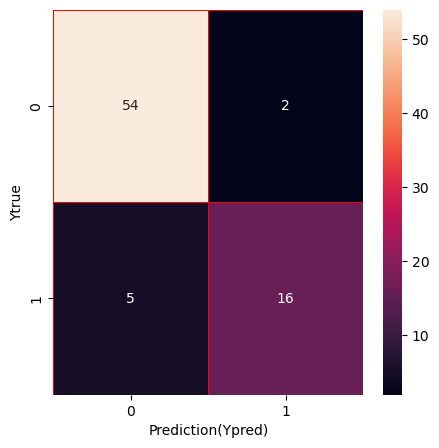

In [39]:
#Confusion Matrix
yprediciton1= clf.predict(x_test)
ytrue = y_test

CM = confusion_matrix(ytrue,yprediciton1)

#CM visualization


f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(CM,annot = True, linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Prediction(Ypred)")
plt.ylabel("Ytrue")
plt.show()
